In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
import re
import pandas as pd

# visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# machine learning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# This dataset...
There are 9 total columns, and we are going to make a model that predicts the outcome column using 8 columns.
Look at the distribution of the 8 columns and look at their correlation with the Outcome column.
An outcome of 1 is normal and 0 means diabetes.

- Below we will look at missing values and distributions.
- The data set consists of 768 datas.
- It has 9 columns, of which 8 are numerical and Outcome is a categorical.


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<AxesSubplot:>

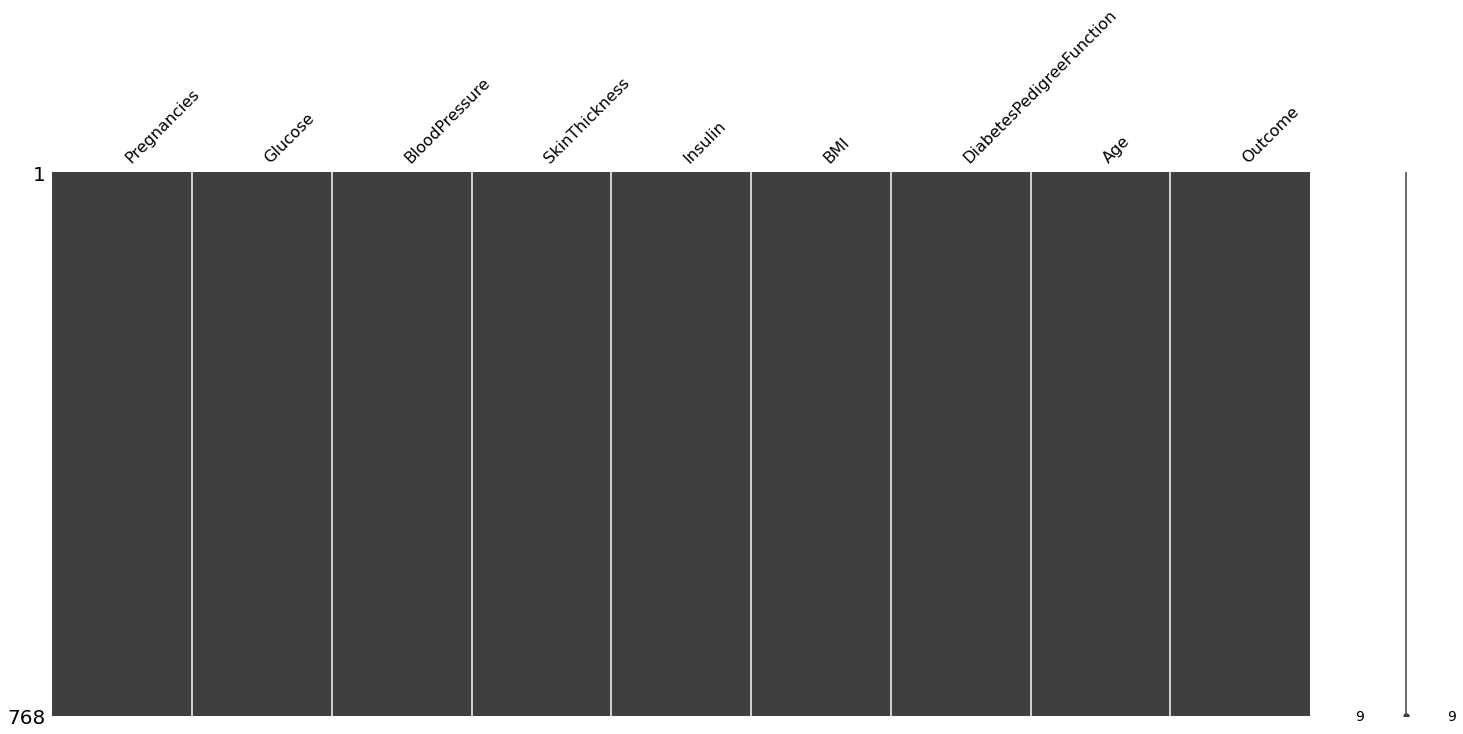

In [6]:
# Check the missing values
print(df.isnull().sum())
msno.matrix(df)

In [7]:
# 데이터 모양 , 메모리

print('Data set shape = {}'.format(df.shape))
print('Data set Memory Usage = {:.2f}MB'.format(df.memory_usage().sum()/1024**2))

Data set shape = (768, 9)
Data set Memory Usage = 0.05MB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

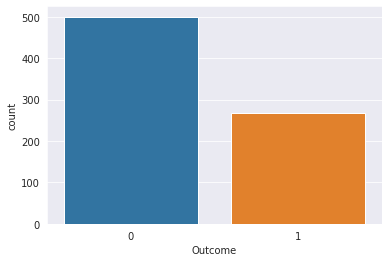

In [8]:
# 예측해야하는 값 비율 확인
sns.set_style("darkgrid")
sns.countplot(df['Outcome'])

In [9]:
print('patients with diabete {}'.format(df['Outcome'].value_counts()[0]))
print('patients without diabete {}'.format(df['Outcome'].value_counts()[1]))

patients with diabete 500
patients without diabete 268


In [10]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

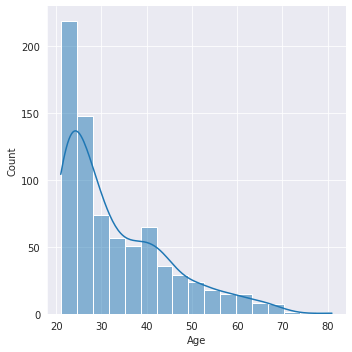

In [11]:
sns.displot(df['Age'],kde=True,stat="count")

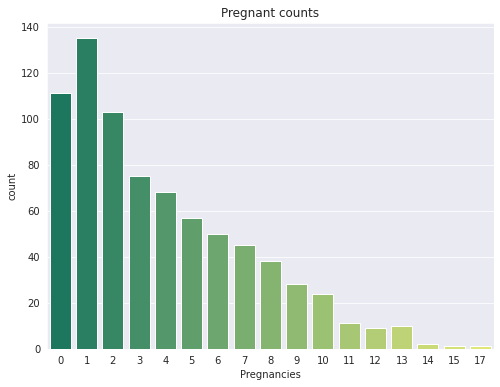

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Pregnancies',palette='summer')
plt.title("Pregnant counts")
plt.show()

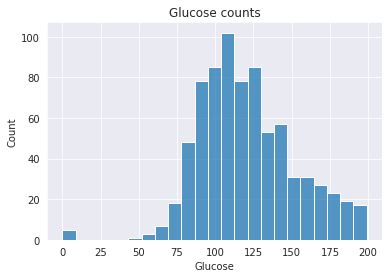

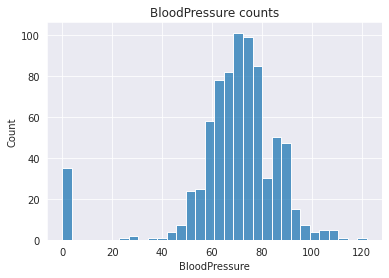

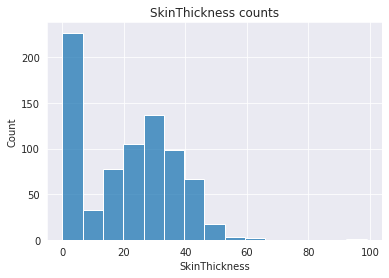

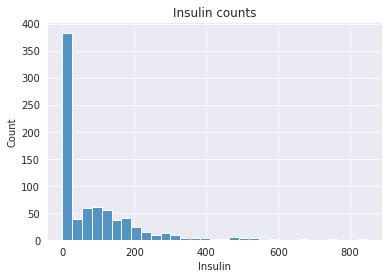

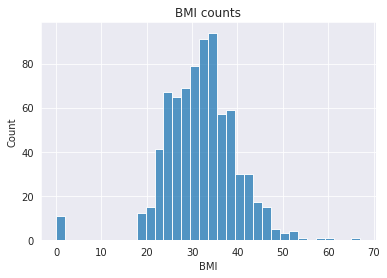

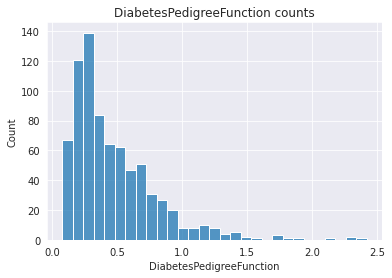

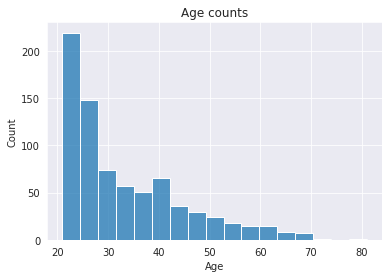

In [13]:
numerical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in numerical_cols:
    sns.histplot(data=df, x=col ,palette='summer')
    plt.title("{} counts".format(col))
    plt.show()
    

# Bivariate Analysis

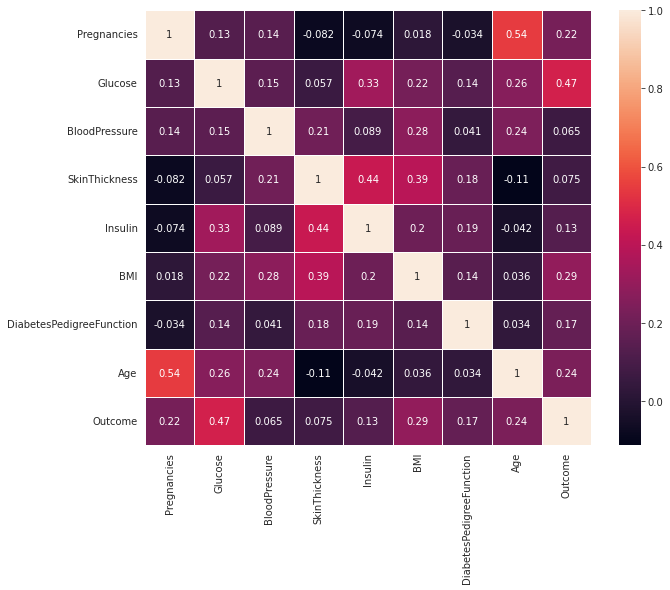

In [15]:
cor_mat = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_mat,annot=True,linewidth=.5);

In [16]:
cols = list(df.columns)
target_col = cols.pop()
print('total_cols is ', cols)
print('target_col is ', target_col)

total_cols is  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_col is  Outcome


## Comparing distribution of features with/without diabetes
- histplot

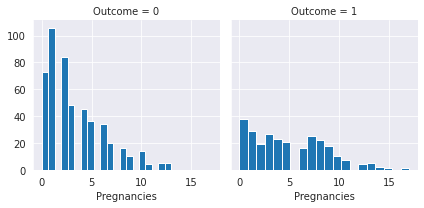

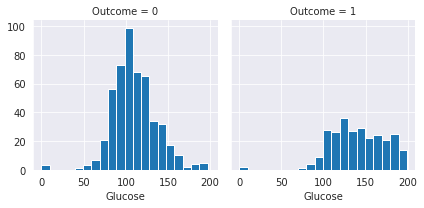

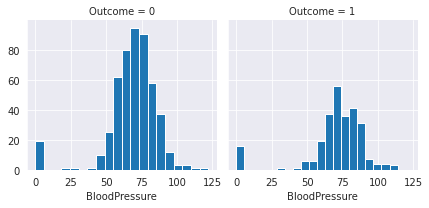

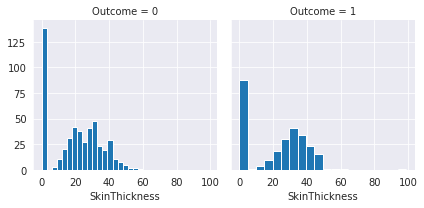

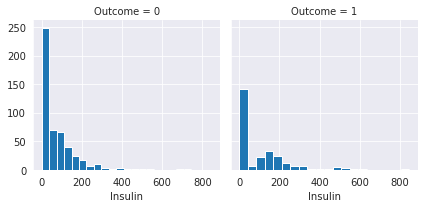

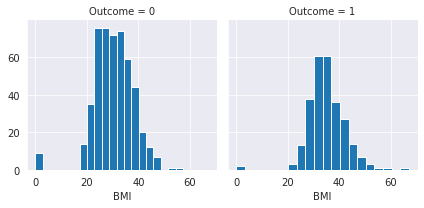

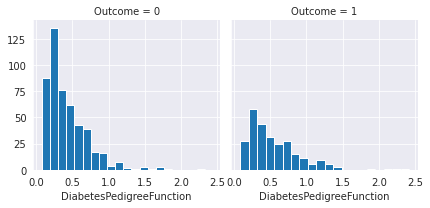

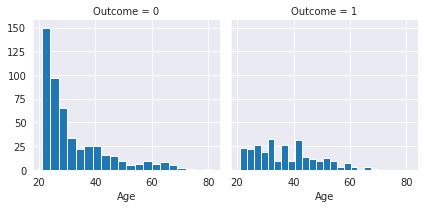

In [17]:
for col in cols:
    g = sns.FacetGrid(df, col='Outcome')
    g.map(plt.hist, col, bins=20)

## Draw two distributions on one plot.
- kdeplot
    - x = each features
    - hue = Outcome 

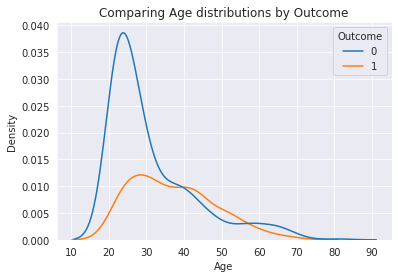

In [18]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df,x='Age',hue='Outcome')
plt.title("Comparing Age distributions by Outcome")
plt.show()

In [19]:
print(len(df[(df['Age']<=30) & (df['Outcome']==0)])/len(df[df['Age']<=30]))
len(df[(df['Age']>30) & (df['Outcome']==0)])/len(df[df['Age']>30])


0.7841726618705036


0.4928774928774929

**Age column**
- 30세 이하인 사람들 중에서 정상(당뇨X)인 사람 = 약 78.4%
- 30세 이상인 사람들 중에서 정상(당뇨X)인 사람 = 약 49.3% 

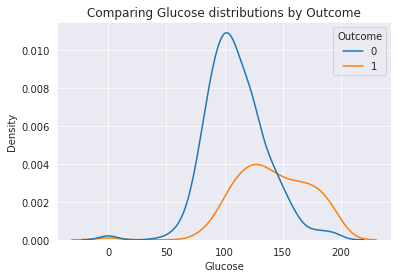

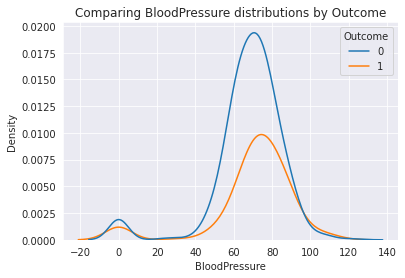

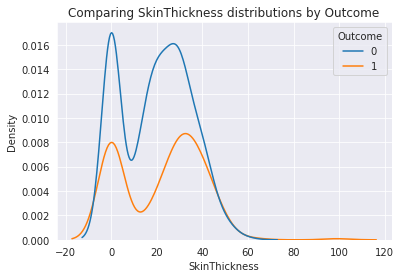

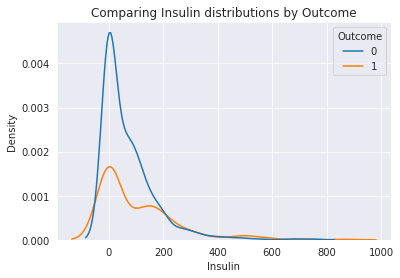

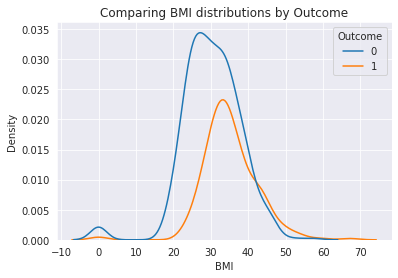

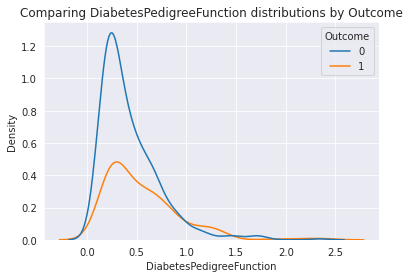

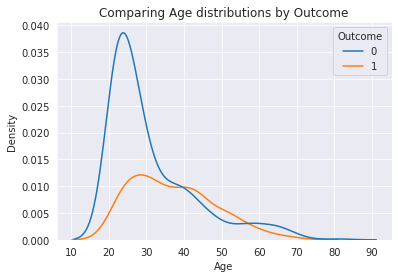

In [20]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df,x=col,hue='Outcome')
    plt.title("Comparing {} distributions by Outcome".format(col))
    plt.show()

## Model train/predict part 
1. LogisticRegression
2. LogisticRegression + Standardization
3. DecisionTreeClassifier
4. RandomForestClassifier
5. GradientBoostingClassifier
6. XGBClassifier
7. Ensemble models
    - RandomForestClassifier + GradientBoostingClassifier => XGBClassifier
    - RandomForestClassifier + GradientBoostingClassifier => LogisticRegression

In [21]:
X = df.drop(['Outcome'],axis=1)
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
print('train size = {}'.format(X_train.shape[0]))
print('test size = {}'.format(X_test.shape[0]))

train size = 614
test size = 154


In [24]:
# 1. LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [26]:
model2 = LogisticRegression(penalty='l2')
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred2, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [28]:
def std_normalization(data,cols:[list]):
    for col in cols:
        data[col] = (data[col] - data[col].mean())/data[col].std()
    return data

In [29]:
'''
df_n = std_normalization(df,cols)
# round(df,2)

X_n = df_n.drop(['Outcome'],axis=1)
y = df_n.Outcome
X_train_n, X_test_n, y_train, y_test = train_test_split(X_n, y, test_size=0.2, random_state=0)

n_model = LogisticRegression()
n_model.fit(X_train_n,y_train)
y_pred_n = n_model.predict(X_test_n)

print(classification_report(y_test, y_pred_n, target_names=['0','1']))
'''

"\ndf_n = std_normalization(df,cols)\n# round(df,2)\n\nX_n = df_n.drop(['Outcome'],axis=1)\ny = df_n.Outcome\nX_train_n, X_test_n, y_train, y_test = train_test_split(X_n, y, test_size=0.2, random_state=0)\n\nn_model = LogisticRegression()\nn_model.fit(X_train_n,y_train)\ny_pred_n = n_model.predict(X_test_n)\n\nprint(classification_report(y_test, y_pred_n, target_names=['0','1']))\n"

In [30]:
# 2. DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_dt, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       107
           1       0.63      0.68      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.79      0.78      0.78       154



In [32]:
# 3. RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred_rf, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



In [34]:
# 4. GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=300)
gb_model.fit(X_train,y_train)
y_pred_gb = gb_model.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred_gb, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.66      0.74      0.70        47

    accuracy                           0.81       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.81      0.81      0.81       154



In [36]:
# 5. XGBClassifier
import xgboost as xgb

xgbmodel = xgb.XGBClassifier(n_estimators=250, max_depth=10)
xgbmodel.fit(X_train,y_train)
y_pred_xgb = xgbmodel.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred_xgb, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.65      0.66      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154



### GridsearchCV 를 통한 XGBoost 하이퍼파라미터 튜닝
- gamma, max_depth, min_child_weight

In [39]:
param_grid = {
    'gamma':[i/10 for i in range(0,5,1)],
    'max_depth': [3,7,10], 
    'min_child_weight':[1,3]
}

In [40]:
model = xgb.XGBClassifier(n_estimators=100,objective='binary:logistic')
gridCV = GridSearchCV(estimator=model, param_grid=param_grid, cv= 3)
gridCV.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [41]:
gridCV.best_params_

{'gamma': 0.4, 'max_depth': 7, 'min_child_weight': 1}

In [42]:
model = xgb.XGBClassifier(
    n_estimators=100,
    objective='binary:logistic',
    gamma=0.4, 
    max_depth=7, 
    min_child_weight=1
)

In [43]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       107
           1       0.62      0.70      0.66        47

    accuracy                           0.78       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.79      0.78      0.78       154



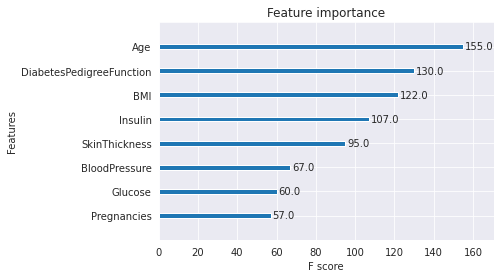

In [45]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.yticks(range(8), cols)
plt.show()

In [46]:
model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0.4,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 7,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [47]:
final_model = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



### Ensemble models
    - RandomForestClassifier + GradientBoostingClassifier => XGBClassifier
    - RandomForestClassifier + GradientBoostingClassifier => LogisticRegression

In [48]:
from sklearn.model_selection import KFold

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
# Some useful parameters which will come in handy later on
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, shuffle=True,random_state=SEED)

In [51]:
x_train = X_train.reset_index().drop(['index'],axis=1)
x_test = X_test.reset_index().drop(['index'],axis=1)
y_train = y_train.reset_index().Outcome
y_test = y_test.reset_index().Outcome

In [52]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)


def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.loc[train_index]
        y_tr = y_train.loc[train_index]
        x_te = x_train.loc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [53]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [54]:
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)

In [55]:
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test)
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) 
print("Training is complete")

Training is complete


In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("GB-CV: {}".format(sqrt(mean_squared_error(y_train, gb_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))

GB-CV: 0.5277325351581946
RF-CV: 0.35642086164938847


In [57]:
gb_feature = gb.feature_importances(x_train,y_train)
rf_feature = rf.feature_importances(x_train,y_train)

[0.05401609 0.32620151 0.07107222 0.0342023  0.06238181 0.192758
 0.13350999 0.12585809]
[0.08098666 0.30126439 0.05837438 0.05347868 0.06193118 0.1921673
 0.09920889 0.15258852]


In [58]:
print('data columns: ',cols)

data columns:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [59]:
gb_feature = [0.05401609, 0.32620151, 0.07107222, 0.0342023,  0.06238181, 0.192758, 0.13350999, 0.12585809]
rf_feature = [0.08098666, 0.30126439, 0.05837438, 0.05347868, 0.06193118, 0.1921673, 0.09920889, 0.15258852]
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
                                   'Gradient Boost feature importances': gb_feature,
                                   'Random Forest feature importances': rf_feature,
                                  })
feature_dataframe

,features,Gradient Boost feature importances,Random Forest feature importances
0,Pregnancies,0.054016,0.080987
1,Glucose,0.326202,0.301264
2,BloodPressure,0.071072,0.058374
3,SkinThickness,0.034202,0.053479
4,Insulin,0.062382,0.061931
5,BMI,0.192758,0.192167
6,DiabetesPedigreeFunction,0.133510,0.099209
7,Age,0.125858,0.152589


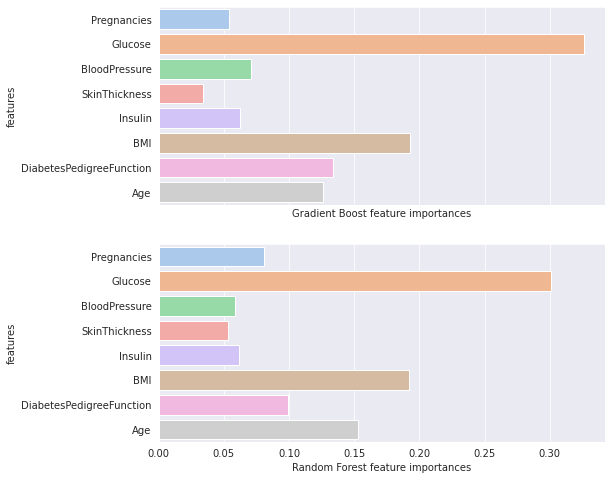

In [60]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)


sns.barplot(data=feature_dataframe, x="Gradient Boost feature importances", y='features',palette='pastel', ax=ax1)

sns.barplot(data=feature_dataframe, x="Random Forest feature importances", y='features',palette='pastel', ax=ax2)

plt.show()

In [61]:
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe

,features,Gradient Boost feature importances,Random Forest feature importances,mean
0,Pregnancies,0.054016,0.080987,0.067501
1,Glucose,0.326202,0.301264,0.313733
2,BloodPressure,0.071072,0.058374,0.064723
3,SkinThickness,0.034202,0.053479,0.043840
4,Insulin,0.062382,0.061931,0.062156
5,BMI,0.192758,0.192167,0.192463
6,DiabetesPedigreeFunction,0.133510,0.099209,0.116359
7,Age,0.125858,0.152589,0.139223


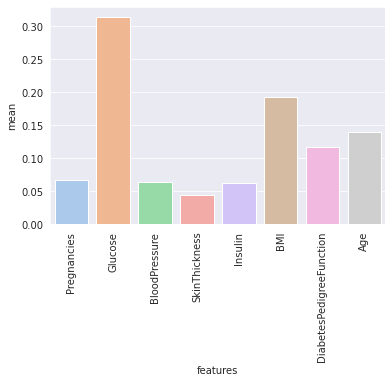

In [62]:
sns.barplot(data=feature_dataframe, x='features', y="mean",palette='pastel')
plt.xticks(rotation=90)
plt.show()

In [63]:
x_train = np.concatenate((gb_oof_train, rf_oof_train), axis=1)
x_test = np.concatenate((gb_oof_test, rf_oof_test), axis=1)

In [64]:
print("{},{}".format(x_train.shape, x_test.shape))

(614, 2),(154, 2)


In [65]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_lr = lr_model.predict(x_test)
print(classification_report(y_test, y_lr, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.76      0.66      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



In [67]:
xgb_model = xgb.XGBClassifier(
                         n_estimators= 1000,
                         max_depth= 7,
                         min_child_weight= 1,
                         gamma=0.3)
xgb_model.fit(x_train, y_train)
y_xgb = xgb_model.predict(x_test)
print(classification_report(y_test, y_xgb, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.76      0.66      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



In [69]:
y_tmp = xgb_model.predict(x_train)
print(classification_report(y_train, y_tmp, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       393
           1       0.88      0.75      0.81       221

    accuracy                           0.87       614
   macro avg       0.87      0.85      0.86       614
weighted avg       0.87      0.87      0.87       614



***Stacking and Ensemble reference***
- https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python#Ensembling-&-Stacking-models
- https://www.kaggle.com/code/eliotbarr/stacking-test-sklearn-xgboost-catboost-lightgbm